# Directors 

# 1. Import Data 

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data then merge to dataframes 
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
tmbd = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
princi_title=pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_b =pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
movies =pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

In [ ]:
name_basics

Sort name basics file

In [ ]:
names_plane = name_basics.loc[name_basics.duplicated(subset=['primary_name'],keep=False) == True]
names_plane

In [ ]:
id_dir = name_basics.loc[name_basics.duplicated(subset=['nconst'],keep=False) == True]
id_dir

In [ ]:
name_basics = name_basics.drop_duplicates(subset=['primary_name'], keep=False,)

In [ ]:
name_basics

Remove the spaces in the columns.

In [ ]:
princi_title.columns.str.replace(' ', '')
princi_title.head()

Get all the values from data map that contain nconst.

In [ ]:
princi_title = princi_title.sort_values(by=['nconst'])
princi_title.head()

Merge title principles and name basics.

In [16]:
names_descript = pd.merge(
    princi_title,
    name_basics,
    how='inner',
    on ='nconst')
names_descript.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,nan,nan,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.00,nan,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.00,nan,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,nan,nan,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
5,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
6,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
7,tt2712990,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
8,tt2395207,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
9,tt4566480,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


Filter the data so that it shows the primary profession and only director.

In [17]:
directors = names_descript[names_descript["primary_profession"].str.contains('director|director', na=False)]

In [18]:
directors.head()


,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
5,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
6,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
7,tt2712990,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
8,tt2395207,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


Filter the directors by birthday greater than 1939.

In [19]:
directors = directors[directors['birth_year'] > 1939]
directors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
47365,tt1706417,2,nm0000783,self,NaN,"[""Himself""]",Dario Argento,1940.00,nan,"writer,director,producer","tt0065143,tt0093677,tt0073582,tt0087909"
5208,tt3315342,2,nm0001772,actor,NaN,"[""Charles""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
5209,tt6108612,1,nm0001772,actor,NaN,"[""Narrator""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
5210,tt5066056,3,nm0001772,actor,NaN,"[""Harold""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
5211,tt5610626,1,nm0001772,actor,NaN,"[""Drago""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
...,...,...,...,...,...,...,...,...,...,...,...
750831,tt5709892,5,nm8395992,producer,producer,NaN,Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
750833,tt6017238,3,nm8395992,actor,NaN,"[""Alexandr Zlovredniy""]",Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
750834,tt4980576,3,nm8395992,actor,NaN,"[""Andrey""]",Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
750832,tt6018006,2,nm8395992,actor,NaN,"[""Andrey""]",Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"


Merge the directors and ratings.

In [20]:
names_descript = pd.merge(
    directors,
    ratings,
    how='inner',
    on ='tconst')
names_descript

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",3.90,2328
1,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.00,nan,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.90,2328
2,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",4.10,48
3,tt2081348,2,nm0803397,actor,NaN,"[""Paul""]",Jamie Sives,1973.00,nan,"actor,producer,director","tt0862467,tt0329767,tt0291341,tt1226229",4.10,48
4,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",6.50,3460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52154,tt8037610,10,nm0787509,actress,NaN,NaN,Renuka Shahane,1966.00,nan,"actress,writer,director","tt0306971,tt1503723,tt0110076,tt5581434",8.30,247
52155,tt6798460,8,nm7094029,actor,NaN,"[""Commissar Yagoda""]",Soufiane El Khalidy,1987.00,nan,"actor,writer,director","tt6302538,tt6727598,tt6294226,tt1378167",7.90,14
52156,tt8328740,5,nm0466901,director,NaN,NaN,Kitarô Kôsaka,1962.00,nan,"art_department,animation_department,director","tt0092067,tt0382868,tt0094625,tt2013293",6.90,251
52157,tt8861786,3,nm1035160,actor,NaN,"[""Dog Gnarly""]",Tyreese Burnett,1975.00,nan,"actor,producer,art_director","tt0208614,tt1362426,tt0804502,tt0303933",4.40,88


Remove the columns in the rows. 

In [21]:
names_descript.columns.str.replace(', ', '')
names_descript.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",3.90,2328
1,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.00,nan,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.90,2328
2,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",4.10,48
3,tt2081348,2,nm0803397,actor,NaN,"[""Paul""]",Jamie Sives,1973.00,nan,"actor,producer,director","tt0862467,tt0329767,tt0291341,tt1226229",4.10,48
4,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",6.50,3460


Drop all rows that are not needed.

In [22]:
names_descript= names_descript.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
names_descript

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt0323808,nm0059247,editor,Sean Barton,1944.00,"editor,editorial_department,assistant_director",3.90,2328
1,tt0323808,nm0574615,actor,Graham McTavish,1961.00,"actor,soundtrack,director",3.90,2328
2,tt2081348,nm0059247,editor,Sean Barton,1944.00,"editor,editorial_department,assistant_director",4.10,48
3,tt2081348,nm0803397,actor,Jamie Sives,1973.00,"actor,producer,director",4.10,48
4,tt1414378,nm0059247,editor,Sean Barton,1944.00,"editor,editorial_department,assistant_director",6.50,3460
...,...,...,...,...,...,...,...,...
52154,tt8037610,nm0787509,actress,Renuka Shahane,1966.00,"actress,writer,director",8.30,247
52155,tt6798460,nm7094029,actor,Soufiane El Khalidy,1987.00,"actor,writer,director",7.90,14
52156,tt8328740,nm0466901,director,Kitarô Kôsaka,1962.00,"art_department,animation_department,director",6.90,251
52157,tt8861786,nm1035160,actor,Tyreese Burnett,1975.00,"actor,producer,art_director",4.40,88


Pull only the director profession from the category colunmn.

In [23]:
names_descript = names_descript[names_descript["category"].str.contains('director|director', na=False)]
names_descript

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
5,tt1414378,nm0789054,director,Ian Sharp,1946.00,"director,assistant_director,writer",6.50,3460
11,tt1680140,nm0425894,director,Niall Johnson,1965.00,"writer,director,producer",5.10,777
15,tt0417610,nm1145057,director,Alejandro Chomski,1968.00,"director,writer,producer",6.40,80
17,tt1563675,nm0563760,director,Laura Mañá,1968.00,"actress,director,writer",6.20,17
20,tt0426566,nm1163513,director,Julio Bove,1954.00,"producer,director,actor",6.00,13
...,...,...,...,...,...,...,...,...
52147,tt9260454,nm1887409,director,Dani Rosenberg,1979.00,"writer,director,producer",8.60,11
52150,tt7001792,nm0088392,director,Michael Blieden,1971.00,"writer,director,actor",6.00,8
52153,tt7836394,nm9535026,director,Nico Baumbach,1986.00,"director,cinematographer,editor",8.10,8
52156,tt8328740,nm0466901,director,Kitarô Kôsaka,1962.00,"art_department,animation_department,director",6.90,251


1..Making a new variable that stores average rating mutiplied by their votes. 
2.Sort values by ascending.

In [24]:
names_descript['Popularity_Ratings'] = names_descript['averagerating'] * names_descript['numvotes']
names_descript.sort_values(by=['Popularity_Ratings'],ascending=False)

<ipython-input-24-52fb35f770a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_descript['Popularity_Ratings'] = names_descript['averagerating'] * names_descript['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,Popularity_Ratings
15350,tt1375666,nm0634240,director,Christopher Nolan,1970.00,"writer,producer,director",8.80,1841066,16201380.80
30654,tt1345836,nm0634240,director,Christopher Nolan,1970.00,"writer,producer,director",8.40,1387769,11657259.60
30659,tt0816692,nm0634240,director,Christopher Nolan,1970.00,"writer,producer,director",8.60,1299334,11174272.40
2401,tt0848228,nm0923736,director,Joss Whedon,1964.00,"writer,producer,director",8.10,1183655,9587605.50
11986,tt0993846,nm0000217,director,Martin Scorsese,1942.00,"producer,director,actor",8.20,1035358,8489935.60
...,...,...,...,...,...,...,...,...,...
44039,tt5364390,nm0158427,director,Derek Chiu,1961.00,"director,writer,producer",2.00,5,10.00
12417,tt5935758,nm3062127,director,Geno McGahee,1974.00,"writer,producer,director",2.00,5,10.00
45700,tt8476266,nm2508880,director,Ján Novák,1966.00,"director,writer,editor",1.50,6,9.00
46010,tt6153116,nm1512437,director,Maria Ramos,1964.00,"director,writer,producer",1.00,7,7.00


Drop columns that are not needed then sort the popularity and rating to ascending.

In [25]:
director_ratings = names_descript.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes',], axis=1)
director_ratings.sort_values(by=['Popularity_Ratings'],ascending=False)

,primary_name,Popularity_Ratings
15350,Christopher Nolan,16201380.80
30654,Christopher Nolan,11657259.60
30659,Christopher Nolan,11174272.40
2401,Joss Whedon,9587605.50
11986,Martin Scorsese,8489935.60
...,...,...
44039,Derek Chiu,10.00
12417,Geno McGahee,10.00
45700,Ján Novák,9.00
46010,Maria Ramos,7.00


Group primary name,mean, and count.
Find the mean of the popularity and reviews.

In [26]:
directors_rank = director_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
directors_rank = directors_rank.rename(columns={'mean':'Popularity_Ratings','count':'count'})
directors_rank.columns = directors_rank.columns.droplevel(0)
directors_rank = directors_rank.sort_values(by=['Popularity_Ratings'],ascending=False)
directors_rank

,Popularity_Ratings,count
primary_name,,
Christopher Nolan,10679723.70,4
Joss Whedon,4852476.57,3
Anthony Russo,4833244.80,4
Joe Russo,4833244.80,4
David Fincher,4523356.60,3
...,...,...
Daisuke Yamanouchi,16.60,4
Henrik Normann,16.00,1
Ping Ho,13.20,1


In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

List out the top 10 directors inside of variable called top_10_dir

In [28]:
top_10_dir = directors_rank.head(10)
top_10_dir

,Popularity_Ratings,count
primary_name,,
Christopher Nolan,10679723.70,4
Joss Whedon,4852476.57,3
Anthony Russo,4833244.80,4
Joe Russo,4833244.80,4
David Fincher,4523356.60,3
James Gunn,3960186.50,3
Chris Buck,3877485.00,1
Patty Jenkins,3656452.50,1
Matthew Vaughn,3557716.60,4


# Plot Data

<function matplotlib.pyplot.show(close=None, block=None)>

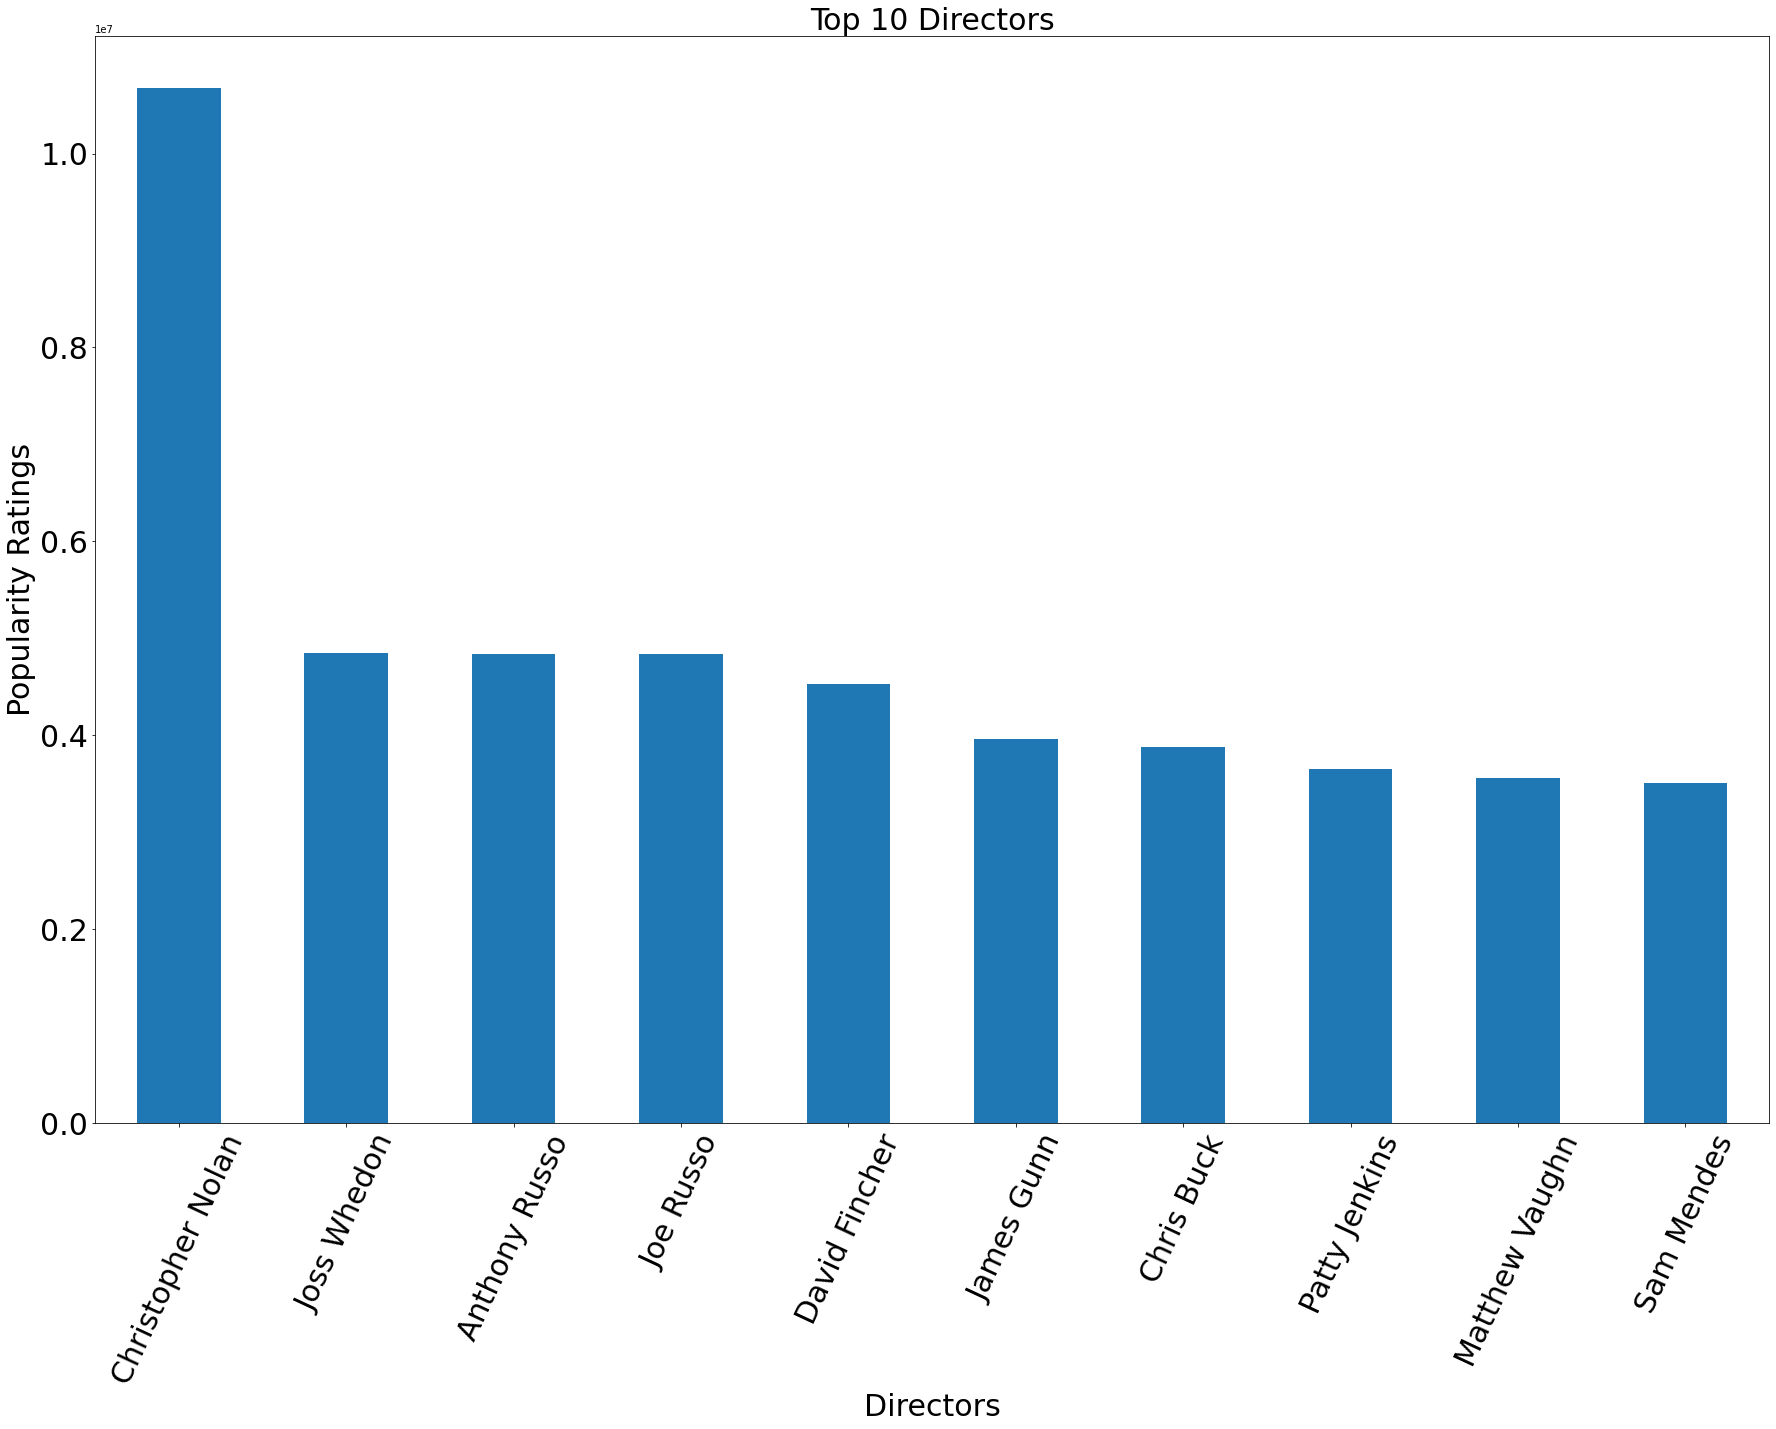

In [29]:
from matplotlib import pyplot as plt
top_10_dir['Popularity_Ratings'].plot(kind="bar",figsize=(30, 20),fontsize=30)

plt.title("Top 10 Directors",fontsize=30)
plt.ylabel("Popularity Ratings",fontsize=30)
plt.xlabel("Directors",fontsize=30)
plt.xticks(rotation = 65)
plt.show